In [30]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [31]:
random_value = 42
random.seed(random_value)
np.random.seed(random_value)

In [32]:
class CreateSampleDataset():
    def __init__(self, n_teachers=1000, school_teacher_ratio=1.05, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.7):
        self.n_teachers = n_teachers
        self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced

    def _createTeachers(self):
        x_location = np.random.uniform(0., 1., self.n_teachers)
        y_location = np.random.uniform(0., 1., self.n_teachers)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'ID': range(self.n_teachers),
                    'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experience': experienced,
                    }

        return teachers

    def _createSchools(self):
        x_location = np.random.uniform(0., 1., self.n_schools)
        y_location = np.random.uniform(0., 1., self.n_schools)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_schools)
        n_teachers = np.random.normal(loc=self.teacher_per_school, scale=self.std_dev_teacher_per_school, size=self.n_schools).astype(int)
        n_teachers_clipped = np.clip(n_teachers, a_min=self.min_teachers_per_school, a_max=None, out=n_teachers)
        schools = {'ID': range(self.n_schools),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers_clipped,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [33]:
data = pd.read_csv('Fabi/master_dataset.csv', sep=',')

In [133]:
class CreateNSWDataset():
    def __init__(self, data, n_teachers=54000, school_teacher_ratio=1.2, teacher_per_school=15.,
                 std_dev_teacher_per_school=3., min_teachers_per_school=5, p_rural=0.3, p_car=0.7, p_experienced=0.7):
        self.data = data
        self.n_teachers = int(n_teachers / 1.05)
        self.n_schools = len(data)
        #self.n_schools = int(n_teachers * school_teacher_ratio / teacher_per_school)        
        self.teacher_per_school = teacher_per_school
        self.std_dev_teacher_per_school = std_dev_teacher_per_school
        self.min_teachers_per_school = min_teachers_per_school
        self.p_rural = p_rural
        self.p_car = p_car
        self.p_experienced = p_experienced
        
        self.big_cities = np.array([[151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.209444, -33.865],
                       [151.75, -32.916667],
                       [151.2, -33.3],
                       [150.893915, -34.427243],
                       [151.55, -32.716667],
                       [150.3, -33.7],
                       [153.55, -29.183333],
                       [147.368889, -35.118889],
                       [150.0, -37.5]])
        
    def _createTeachers_v2(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        for _ in range(10):
            loc_school = np.concatenate((loc_school, self.big_cities))
        loc_school = np.resize(loc_school, (self.n_teachers,2))
        x_location = loc_school[:,0] + np.random.normal(0, 0.3, size=self.n_teachers)
        y_location = loc_school[:,1] + np.random.normal(0, 0.3, size=self.n_teachers)
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=self.n_teachers)
        car = np.random.choice([0, 1], p=[1 - self.p_car, self.p_car], size=self.n_teachers)
        experienced = np.random.choice([0, 1], p=[1 - self.p_experienced, self.p_experienced], size=self.n_teachers)
        teachers = {'ID': range(self.n_teachers),
                    'x_location': x_location,
                    'y_location': y_location,
                    'rural': rural,
                    'car': car,
                    'experience': experienced,
                    }

        return teachers
    
    def _createSchools(self):
        loc_school = np.array([data['Longitude'], data['Latitude']]).T
        x_location = loc_school[:,0]
        y_location = loc_school[:,1]
        rural = np.random.choice([0, 1], p=[1 - self.p_rural, self.p_rural], size=len(loc_school))
        n_teachers = self.data["latest_year_enrolment_FTE"] / self.teacher_per_school
        
        schools = {'ID': range(len(loc_school)),
                   'x_location': x_location,
                   'y_location': y_location,
                   'rural': rural,
                   'n_teachers': n_teachers,
                   }

        return schools

    def make_dataset(self):
        teachers = pd.DataFrame(self._createTeachers_v2())
        schools = pd.DataFrame(self._createSchools())

        return teachers, schools

In [134]:
#DatasetSampler = CreateSampleDataset()
#teachers, schools = DatasetSampler.make_dataset()
DatasetSampler = CreateNSWDataset(data)
teachers, schools = DatasetSampler.make_dataset()

In [135]:
teachers.head()

,ID,x_location,y_location,rural,car,experience
0,0,151.516722,-33.408175,0,1,1
1,1,151.073334,-32.059816,0,1,0
2,2,150.918234,-32.819936,0,1,1
3,3,149.076767,-35.505291,0,0,0
4,4,151.825490,-33.007276,0,0,1


In [136]:
schools.head()

,ID,x_location,y_location,rural,n_teachers
0,0,151.131206,-33.852728,1,35.400000
1,1,150.888095,-32.166098,0,12.733333
2,2,151.426499,-32.808920,0,18.000000
3,3,148.776721,-35.993292,0,1.266667
4,4,151.730971,-32.932213,1,21.133333


In [137]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

school_per_cluster = 120
n_iterations = 5
min_differences = []
variances = []
noise = np.random.normal(loc=0., scale=0.05, size=(n_iterations, len(teachers), 2))

def custom_loss(x, y):
    return np.sum((x - y)**2)

# Finding the best random seed for kmeans
for i in range(n_iterations):
    # Kmeans for School-to-Cluster
    X_train = np.array(schools[['x_location', 'y_location']])
    labels = [i for i in range((DatasetSampler.n_schools // school_per_cluster))]
    kmeans = KMeans(n_clusters=(DatasetSampler.n_schools // school_per_cluster), random_state=i)
    preds = kmeans.fit_predict(X_train, labels)
    means = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    schools['cluster'] = cluster_labels
    
    # KNN for Teacher-to-Cluster
    knn = KNeighborsClassifier(n_neighbors=1, metric=custom_loss)
    X_train = means
    y_train = labels
    knn.fit(X_train, y_train)
    X_test = np.array(teachers[['x_location', 'y_location']]) + noise[i]
    preds = knn.predict(X_test)
    teachers['cluster'] = preds
    
    # Apply Metric
    teacher_demand = schools.groupby(by='cluster')['n_teachers'].sum()
    teacher_supply = teachers.groupby(by='cluster')['x_location'].count()
    teachers_difference = teacher_supply - teacher_demand
    teachers_difference_pct = teachers_difference / teacher_demand
    min_difference = min(teachers_difference_pct)
    min_differences.append(min_difference)
    variances.append(teachers_difference_pct.std()**2)

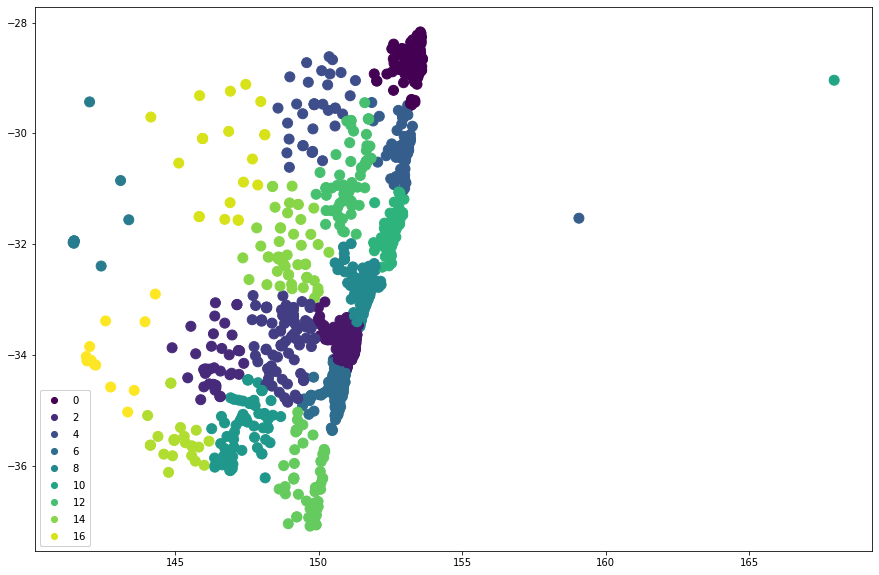

In [138]:
# Do optimized run
best_iteration = np.argmax(np.array(min_differences))
#best_iteration = np.argmin(np.array(variances))
X_train = np.array(schools[['x_location', 'y_location']])
labels = [i for i in range((DatasetSampler.n_schools // school_per_cluster))]
kmeans = KMeans(n_clusters=(DatasetSampler.n_schools // school_per_cluster), random_state=best_iteration)
preds = kmeans.fit_predict(X_train, labels)
means = kmeans.cluster_centers_
schools['cluster'] = preds

#plt.figure(figsize=(15,10))
#plt.scatter(X_train[:, 0], X_train[:, 1], c=preds, cmap='rainbow',)
#plt.scatter(means[:, 0], means[:, 1], c=labels, linewidth=10., cmap='rainbow')
#plt.show()
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=preds, s=100)
legend1 = ax.legend(*scatter.legend_elements())
ax.add_artist(legend1)
plt.show()

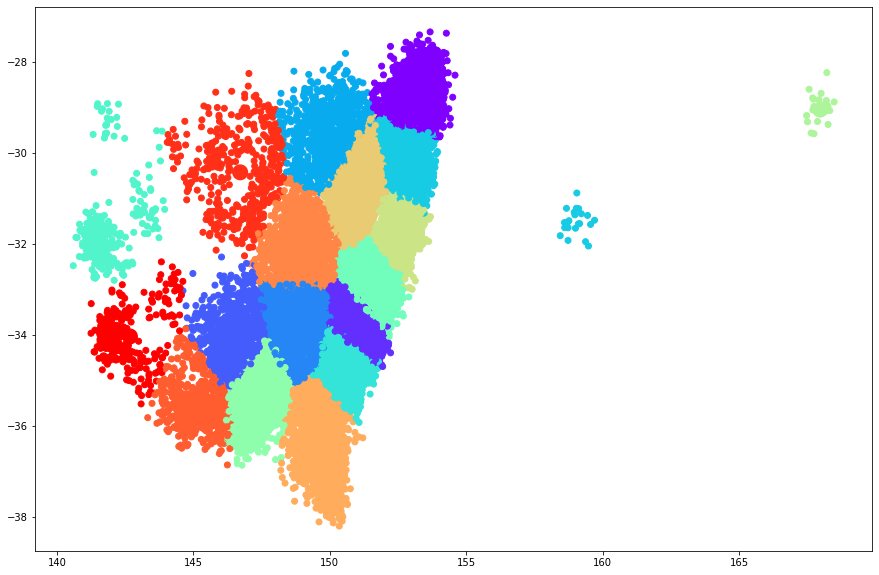

In [139]:
# KNN for Teacher-to-Cluster
knn = KNeighborsClassifier(n_neighbors=1, metric=custom_loss)
X_train = means
y_train = labels
knn.fit(X_train, y_train)
X_test = np.array(teachers[['x_location', 'y_location']])
preds = knn.predict(X_test + noise[i])
teachers['cluster'] = preds

plt.figure(figsize=(15,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, linewidth=10., cmap='rainbow')

In [140]:
# Fill DataFrame
cluster_df = pd.DataFrame({
                           'Cluster ID': labels,
                           'x_location': means[:, 0],
                           'y_location': means[:, 1],
                           'teacher_demand': schools.groupby(by='cluster')['n_teachers'].sum(),
                           'teacher_supply': teachers.groupby(by='cluster')['x_location'].count(),
                           })
cluster_df['teachers_difference'] = cluster_df['teacher_supply'] - cluster_df['teacher_demand']
cluster_df['teachers_difference_pct'] = cluster_df['teachers_difference'] / cluster_df['teacher_demand']

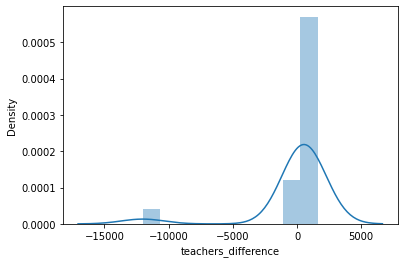

In [141]:
# Absolute Difference
sns.distplot(cluster_df['teachers_difference'], bins=10)

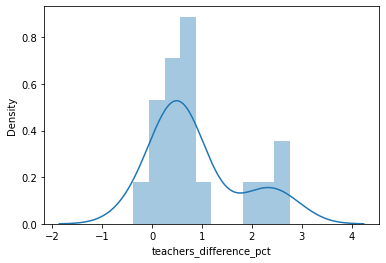

In [142]:
# Relative difference
sns.distplot(cluster_df['teachers_difference_pct'], bins=10)

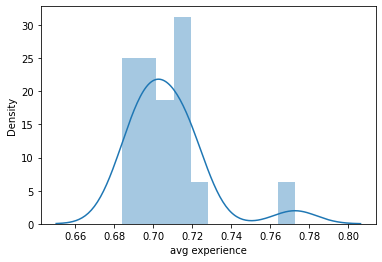

In [143]:
# Get avg experience (is center around 0.7 see class)
cluster_df['avg experience'] = teachers.groupby(by='cluster')['experience'].mean()
sns.distplot(cluster_df['avg experience'], bins=10)

In [144]:
teachers_for_pool = np.array(((cluster_df['teachers_difference_pct'] - (-0.2)) * cluster_df['teacher_demand'])).astype(int)
cluster_df['teachers_for_pool'] = np.clip(teachers_for_pool, a_min=0, a_max=None, out=teachers_for_pool)
cluster_df.head()

,Cluster ID,x_location,y_location,teacher_demand,teacher_supply,teachers_difference,teachers_difference_pct,avg experience,teachers_for_pool
cluster,,,,,,,,,
0,0,153.273722,-28.684040,1750.486667,3012,1261.513333,0.720664,0.691899,1611
1,1,150.989343,-33.841047,32293.846667,20273,-12020.846667,-0.372233,0.702955,0
2,2,146.396604,-34.155041,517.886667,1053,535.113333,1.033263,0.706553,638
3,3,148.884752,-33.715911,1364.573333,2149,784.426667,0.574851,0.695672,1057
4,4,149.899064,-29.575026,254.626667,829,574.373333,2.255747,0.703257,625


In [145]:
# Fix undersupplied clusters
clusters_undersupplied = cluster_df[cluster_df['teachers_difference_pct'] < -0.2]['Cluster ID']
cluster_pool = cluster_df[cluster_df['teachers_difference_pct'] >= -0.2]
cluster_pool_IDs = cluster_pool['Cluster ID']
cluster_pool_x_loc = cluster_pool['x_location']
cluster_pool_y_loc = cluster_pool['y_location']

# Make Reallocation Table
df_reallocation = pd.DataFrame()
for cluster in cluster_pool['Cluster ID']:
    df_reallocation[cluster] = np.zeros(len(clusters_undersupplied)).astype(int)
df_reallocation.set_index(clusters_undersupplied, inplace=True, drop=True)

for ID in clusters_undersupplied:
    cluster_ID = cluster_df['Cluster ID'][ID]
    cluster_x_loc = cluster_df['x_location'][ID]
    cluster_y_loc = cluster_df['y_location'][ID]
    cluster_supply = cluster_df['teacher_supply'][ID]
    cluster_demand = cluster_df['teacher_demand'][ID]
    cluster_optimal_demand = cluster_demand - cluster_supply
    cluster_minimum_demand = int(0.8 * cluster_demand - cluster_supply)
    
    # Get distances to other clusters oversupply of pool clusters
    distances_to_cluster_pool = np.sqrt((cluster_pool_x_loc - cluster_x_loc)**2 + 
                                        (cluster_pool_y_loc - cluster_y_loc)**2)
    sorted_distances = sorted(distances_to_cluster_pool)
    sorted_cluster_pool_IDs = [x for _, x in sorted(zip(distances_to_cluster_pool, cluster_pool_IDs))]
    teachers_oversupply_per_cluster = cluster_pool['teachers_for_pool']
    
    # Reallocate
    for cluster_pool_ID in sorted_cluster_pool_IDs:
        n_allocations = np.clip(cluster_minimum_demand, a_min=None, a_max=teachers_oversupply_per_cluster[cluster_pool_ID])
        cluster_minimum_demand -= n_allocations
        teachers_oversupply_per_cluster[cluster_pool_ID] -= n_allocations
        df_reallocation.loc[[ID], [cluster_pool_ID]] = n_allocations
        
        if cluster_minimum_demand == 0:
            break

In [146]:
for cluster_ID in cluster_pool_IDs:
    teacher_IDs = teachers[teachers['cluster'] == cluster_ID]['ID']
    n_allocations_from_cluster = df_reallocation[cluster_ID].sum()
    teachers_allocated_from_cluster = np.random.choice(teacher_IDs, n_allocations_from_cluster, replace=False)
    for ID in clusters_undersupplied:
        n_allocations_to_cluster = np.array(df_reallocation.loc[[ID], [cluster_ID]])[0][0]
        teachers_allocated_to_cluster = teachers_allocated_from_cluster[:n_allocations_to_cluster]
        teachers_allocated_from_cluster = teachers_allocated_from_cluster[n_allocations_to_cluster:]
        teachers['cluster'] = np.where(teachers['ID'].isin(teachers_allocated_to_cluster), ID, teachers['cluster'])

In [147]:
# Fill DataFrame
cluster_df = pd.DataFrame({
                           'Cluster ID': labels,
                           'x_location': means[:, 0],
                           'y_location': means[:, 1],
                           'teacher_demand': schools.groupby(by='cluster')['n_teachers'].sum(),
                           'teacher_supply': teachers.groupby(by='cluster')['x_location'].count(),
                           })
cluster_df['teachers_difference'] = cluster_df['teacher_supply'] - cluster_df['teacher_demand']
cluster_df['teachers_difference_pct'] = cluster_df['teachers_difference'] / cluster_df['teacher_demand']

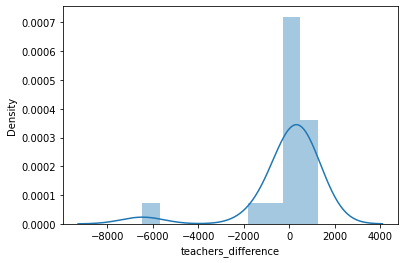

In [148]:
# Absolute Difference
sns.distplot(cluster_df['teachers_difference'], bins=10)

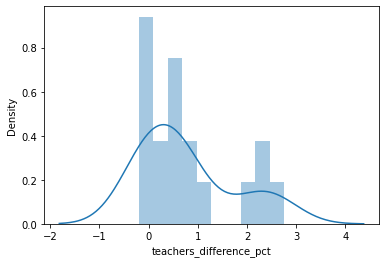

In [149]:
# Relative difference
sns.distplot(cluster_df['teachers_difference_pct'], bins=10)

In [150]:
teachers_from_pool = np.array(((0.2 - cluster_df['teachers_difference_pct']) * cluster_df['teacher_demand'])).astype(int)
cluster_df['teachers_from_pool'] = np.clip(teachers_from_pool, a_min=0, a_max=None, out=teachers_from_pool)
cluster_df.head(15)

,Cluster ID,x_location,y_location,teacher_demand,teacher_supply,teachers_difference,teachers_difference_pct,teachers_from_pool
cluster,,,,,,,,
0,0,153.273722,-28.684040,1750.486667,3012,1261.513333,0.720664,0
1,1,150.989343,-33.841047,32293.846667,25835,-6458.846667,-0.200002,12917
2,2,146.396604,-34.155041,517.886667,1053,535.113333,1.033263,0
3,3,148.884752,-33.715911,1364.573333,1092,-272.573333,-0.199750,545
4,4,149.899064,-29.575026,254.626667,829,574.373333,2.255747,0
5,5,152.984892,-30.284891,1113.013333,1709,595.986667,0.535471,0
6,6,150.617281,-34.590665,3712.086667,2970,-742.086667,-0.199911,1484
7,7,141.847996,-31.679392,175.053333,288,112.946667,0.645213,0
8,8,151.552498,-32.943351,6850.933333,5481,-1369.933333,-0.199963,2740


In [151]:
# Fix oversupplied clusters
clusters_oversupplied = cluster_df[cluster_df['teachers_difference_pct'] > 0.2]['Cluster ID']
cluster_pool = cluster_df[cluster_df['teachers_difference_pct'] <= 0.2]
cluster_pool_IDs = cluster_pool['Cluster ID']
cluster_pool_x_loc = cluster_pool['x_location']
cluster_pool_y_loc = cluster_pool['y_location']

# Make Reallocation Table
df_reallocation = pd.DataFrame()
for cluster in clusters_oversupplied:
    df_reallocation[cluster] = np.zeros(len(cluster_pool_IDs)).astype(int)
df_reallocation.set_index(cluster_pool_IDs, inplace=True, drop=True)
df_reallocation.head(10)

,0,2,4,5,7,9,11,12,13,15,16,17
Cluster ID,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
for ID in clusters_oversupplied:
    cluster_ID = cluster_df['Cluster ID'][ID]
    cluster_x_loc = cluster_df['x_location'][ID]
    cluster_y_loc = cluster_df['y_location'][ID]
    cluster_supply = cluster_df['teacher_supply'][ID]
    cluster_demand = cluster_df['teacher_demand'][ID]
    cluster_optimal_supply = cluster_supply - cluster_demand
    cluster_minimum_supply = int(cluster_supply - 1.2 * cluster_demand)
    
    # Get distances to other clusters oversupply of pool clusters
    distances_to_cluster_pool = np.sqrt((cluster_pool_x_loc - cluster_x_loc)**2 + 
                                        (cluster_pool_y_loc - cluster_y_loc)**2)
    sorted_distances = sorted(distances_to_cluster_pool)
    sorted_cluster_pool_IDs = [x for _, x in sorted(zip(distances_to_cluster_pool, cluster_pool_IDs))]
    teachers_undersupply_per_cluster = cluster_pool['teachers_from_pool']
    
    # Reallocate
    for cluster_pool_ID in sorted_cluster_pool_IDs:
        n_allocations = np.clip(cluster_minimum_supply, a_min=None, a_max=teachers_undersupply_per_cluster[cluster_pool_ID])
        cluster_minimum_supply -= n_allocations
        teachers_undersupply_per_cluster[cluster_pool_ID] -= n_allocations
        df_reallocation.loc[[cluster_pool_ID], [ID]] = n_allocations
        
        if cluster_minimum_supply == 0:
            break

In [153]:
for cluster_ID in clusters_oversupplied:
    teacher_IDs = teachers[teachers['cluster'] == cluster_ID]['ID']
    n_allocations_from_cluster = df_reallocation[cluster_ID].sum()
    teachers_allocated_from_cluster = np.random.choice(teacher_IDs, n_allocations_from_cluster, replace=False)
    for ID in cluster_pool_IDs:
        n_allocations_to_cluster = np.array(df_reallocation.loc[[ID], [cluster_ID]])[0][0]
        teachers_allocated_to_cluster = teachers_allocated_from_cluster[:n_allocations_to_cluster]
        teachers_allocated_from_cluster = teachers_allocated_from_cluster[n_allocations_to_cluster:]
        teachers['cluster'] = np.where(teachers['ID'].isin(teachers_allocated_to_cluster), ID, teachers['cluster'])

In [154]:
# Fill DataFrame
cluster_df = pd.DataFrame({
                           'Cluster ID': labels,
                           'x_location': means[:, 0],
                           'y_location': means[:, 1],
                           'teacher_demand': schools.groupby(by='cluster')['n_teachers'].sum(),
                           'teacher_supply': teachers.groupby(by='cluster')['x_location'].count(),
                           })
cluster_df['teachers_difference'] = cluster_df['teacher_supply'] - cluster_df['teacher_demand']
cluster_df['teachers_difference_pct'] = cluster_df['teachers_difference'] / cluster_df['teacher_demand']

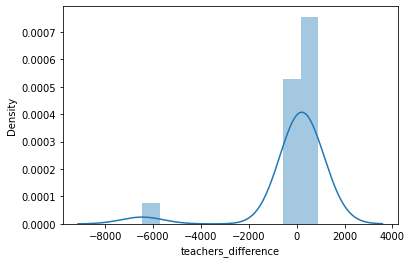

In [155]:
# Absolute Difference
sns.distplot(cluster_df['teachers_difference'], bins=10)

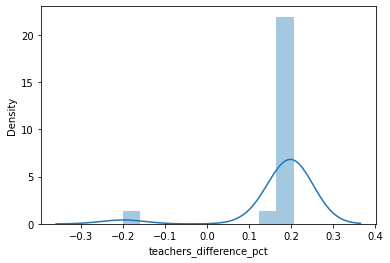

In [156]:
# Relative difference
sns.distplot(cluster_df['teachers_difference_pct'], bins=10)

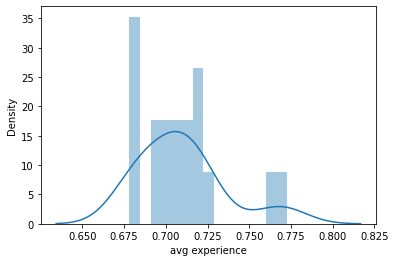

In [157]:
# Get avg experience (is center around 0.7 see class)
cluster_df['avg experience'] = teachers.groupby(by='cluster')['experience'].mean()
sns.distplot(cluster_df['avg experience'], bins=15)